## Name : Omar Hamdy Abdelazim
## Assignment_05
## Group C8 Ai Sat 10AM - 4PM dokki
## Dataset : Expanded_data_with_more_features

## LIBs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

## DATA

In [3]:
df = pd.read_csv('Expanded_data_with_more_features.csv')

In [4]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.isnull().sum()

,0
Gender,0
EthnicGroup,1840
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572
TransportMeans,3134


In [9]:
num_cols = []
cat_cols = []
null_cols = []

for col in df.columns:
    if df[col].dtype != 'object':
        num_cols.append(col)
    else:
        cat_cols.append(col)

for col in df.columns:
    if df[col].isnull().any():
        null_cols.append(col)

print("Categorical features:", cat_cols)
print("-"*50)
print("Numerical features:", num_cols)
print("-"*50)
print("Features with null values:", null_cols)

Categorical features: ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']
--------------------------------------------------
Numerical features: ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']
--------------------------------------------------
Features with null values: ['EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours']


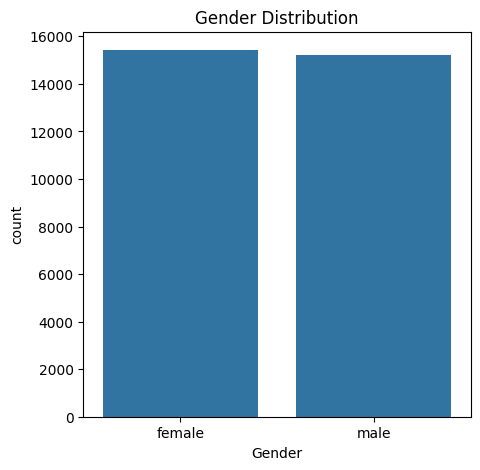

In [10]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = "Gender")
plt.title("Gender Distribution")
plt.show()

## PreProcessing

### 1- Handle Null Values

In [11]:
#handling null values

for col in null_cols:
    if df[col].dtype == 'object':
        df[col].replace('none', 'Unknown', inplace=True)
        df[col].fillna('NoData', inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

In [12]:
df.isnull().sum()

,0
Gender,0
EthnicGroup,0
ParentEduc,0
LunchType,0
TestPrep,0
ParentMaritalStatus,0
PracticeSport,0
IsFirstChild,0
NrSiblings,0
TransportMeans,0


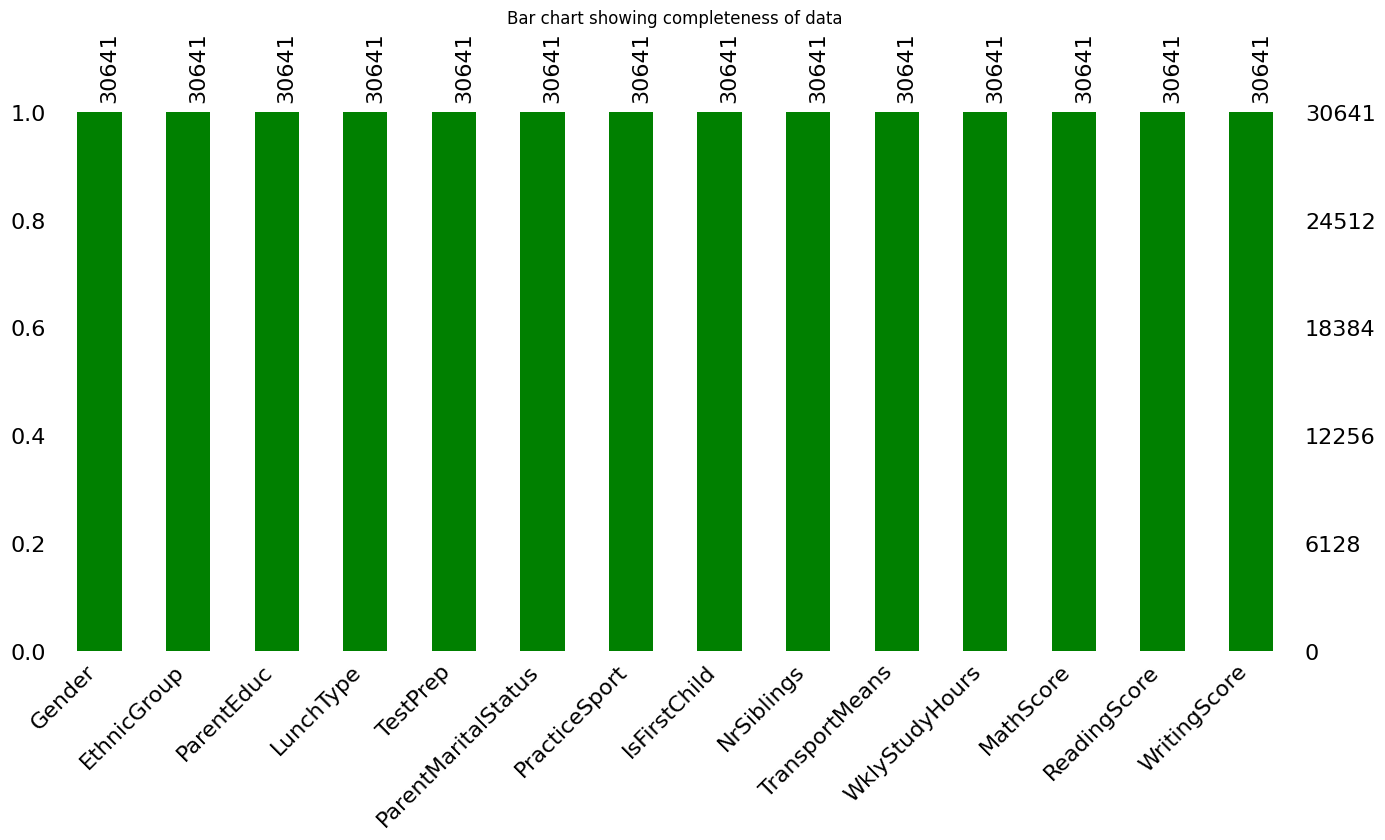

In [13]:
msno.bar(figsize=(16, 7), df=df, color="green")
plt.title("Bar chart showing completeness of data")
plt.xticks(rotation=90)
plt.show()

### 2- Encoding

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
features = ['PracticeSport', 'ParentMaritalStatus',
            'LunchType', 'TestPrep', 'TransportMeans','WklyStudyHours',
            'EthnicGroup','Gender']

original_col_names = df[features].columns.tolist()

encoder = OrdinalEncoder()
df_encoded = pd.DataFrame(encoder.fit_transform(df[features]),
                          columns=original_col_names)

df.reset_index(drop=True, inplace=True)
df_encoded.reset_index(drop=True, inplace=True)

df_final = pd.concat([df.drop(columns=features), df_encoded], axis=1)

In [16]:
df_final.head()

,ParentEduc,IsFirstChild,NrSiblings,MathScore,ReadingScore,WritingScore,PracticeSport,ParentMaritalStatus,LunchType,TestPrep,TransportMeans,WklyStudyHours,EthnicGroup,Gender
0,bachelor's degree,yes,3.0,71,71,74,2.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0
1,some college,yes,0.0,69,90,88,3.0,2.0,1.0,0.0,0.0,0.0,3.0,0.0
2,master's degree,yes,4.0,87,93,91,3.0,3.0,1.0,1.0,2.0,1.0,2.0,0.0
3,associate's degree,no,1.0,45,56,42,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0
4,some college,yes,0.0,76,78,75,3.0,2.0,1.0,1.0,2.0,0.0,3.0,1.0


In [17]:
df_final.head()

,ParentEduc,IsFirstChild,NrSiblings,MathScore,ReadingScore,WritingScore,PracticeSport,ParentMaritalStatus,LunchType,TestPrep,TransportMeans,WklyStudyHours,EthnicGroup,Gender
0,bachelor's degree,yes,3.0,71,71,74,2.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0
1,some college,yes,0.0,69,90,88,3.0,2.0,1.0,0.0,0.0,0.0,3.0,0.0
2,master's degree,yes,4.0,87,93,91,3.0,3.0,1.0,1.0,2.0,1.0,2.0,0.0
3,associate's degree,no,1.0,45,56,42,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0
4,some college,yes,0.0,76,78,75,3.0,2.0,1.0,1.0,2.0,0.0,3.0,1.0


### 3- Check Duplicates

In [18]:
print(df.duplicated().sum())

0


### 4- Outliers

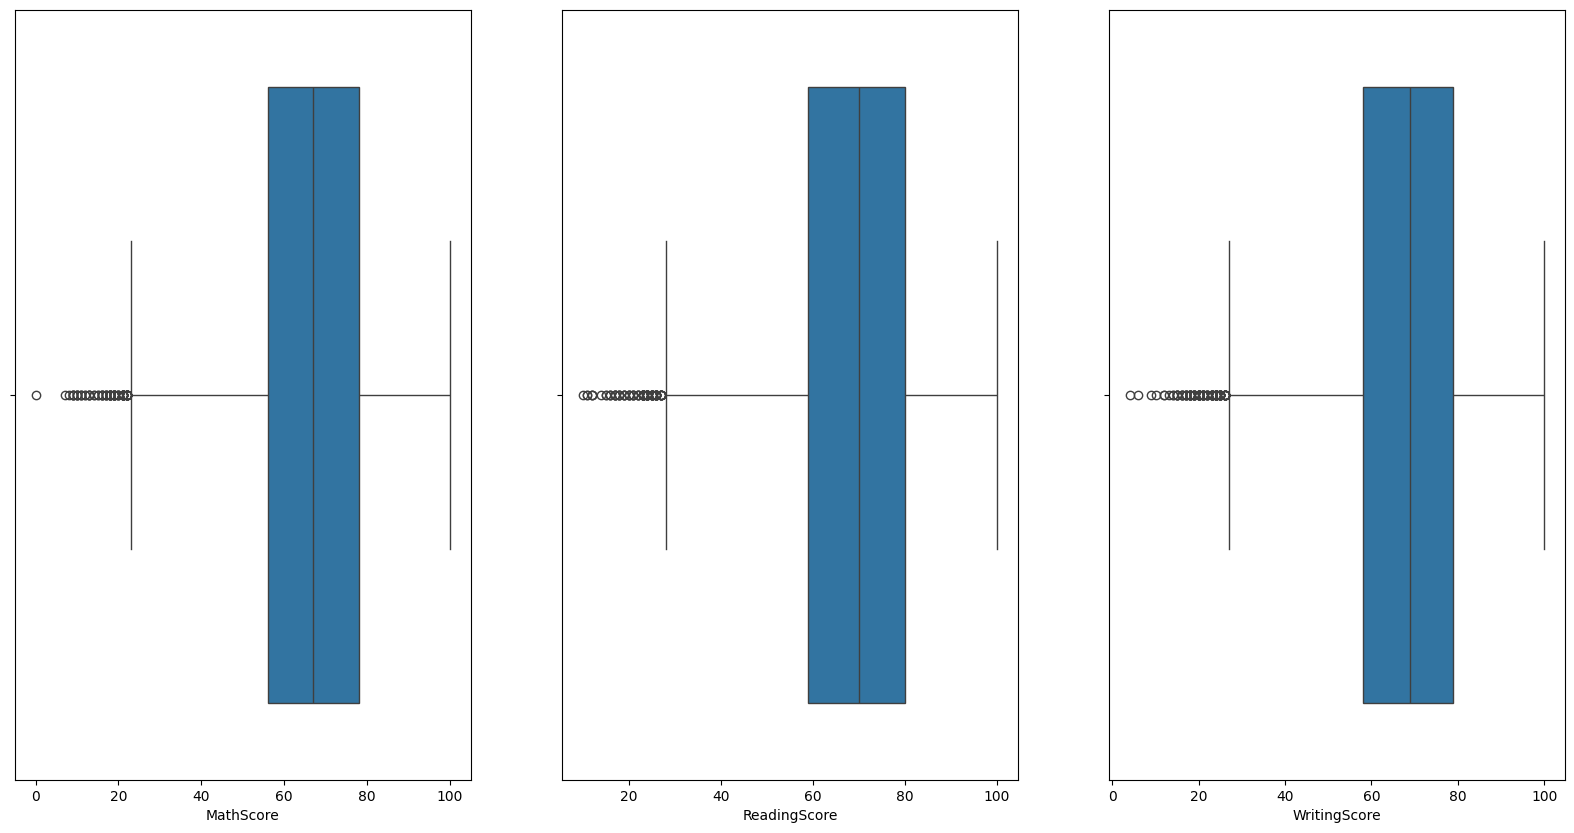

In [19]:
fig , ax = plt.subplots(1,3,figsize = (20,10))

sns.boxplot(data = df_final, x = "MathScore", ax = ax[0])
sns.boxplot(data = df_final, x = "ReadingScore", ax = ax[1])
sns.boxplot(data = df_final, x = "WritingScore", ax = ax[2])

plt.show()

In [20]:
cols = ['MathScore', 'ReadingScore', 'WritingScore']

for col in cols:
  Q1 = df_final[col].quantile(0.25)
  Q3 = df_final[col].quantile(0.75)
  IQR = Q3 - Q1
  Min = Q1 - 1.5 * IQR
  Max = Q3 + 1.5 * IQR

  df_final = df_final[(df_final[col] >= Min) & (df_final[col] <= Max)]

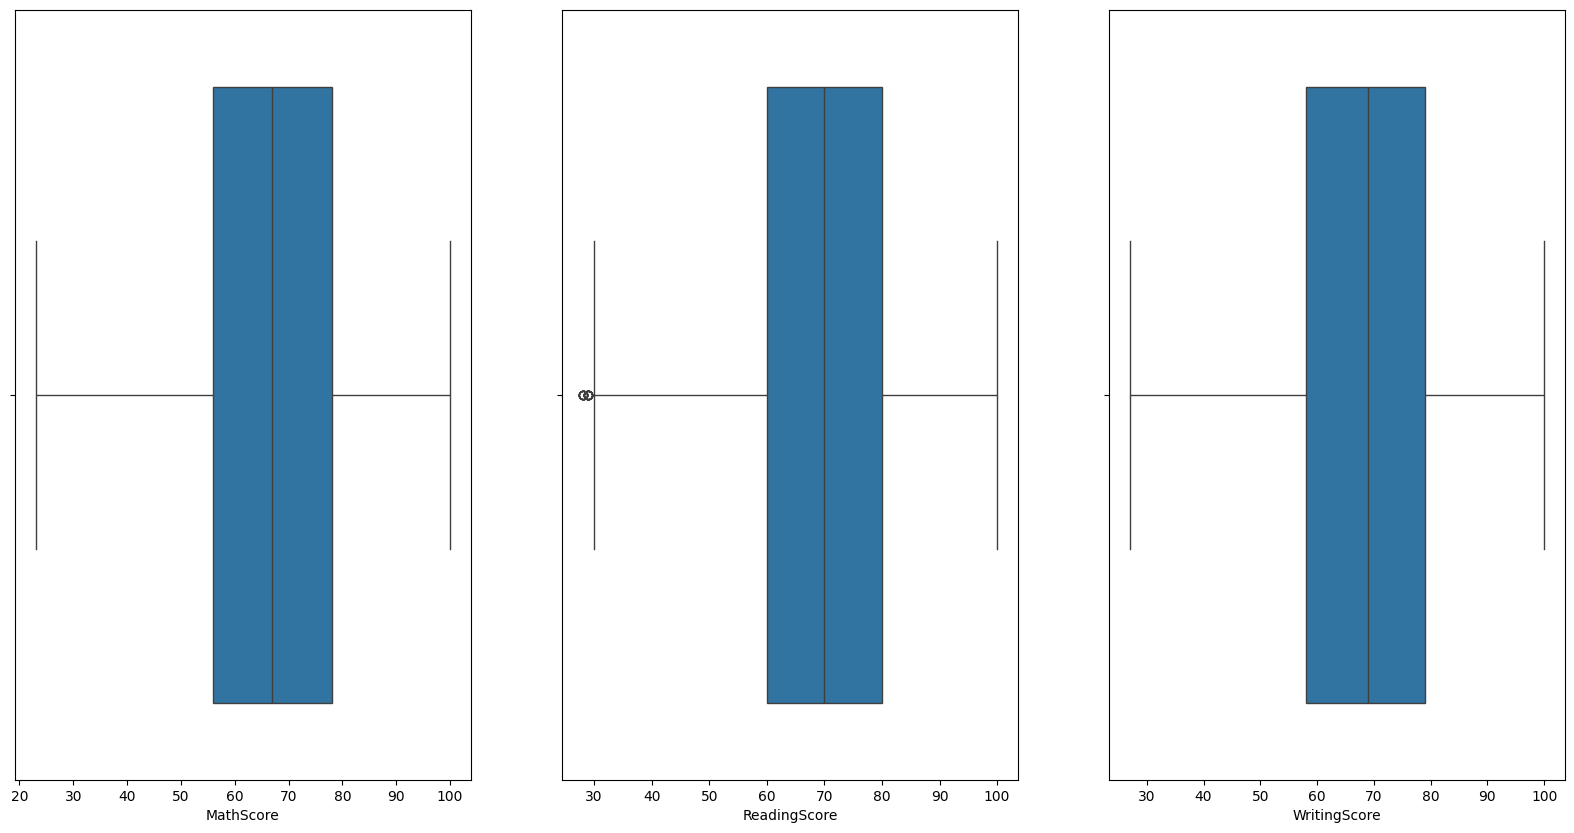

In [21]:
fig , ax = plt.subplots(1,3,figsize = (20,10))

sns.boxplot(data = df_final, x = "MathScore", ax = ax[0])
sns.boxplot(data = df_final, x = "ReadingScore", ax = ax[1])
sns.boxplot(data = df_final, x = "WritingScore", ax = ax[2])

plt.show()

### 5- Splitting

In [22]:
x = df_final[features + ['ReadingScore', 'WritingScore']]
y = df_final['MathScore']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =42)

print('train shape')
print('Xtrain --->', x_train.shape)
print('Ytrain --->', y_train.shape)

print('Test shape')
print('XTest --->', x_test.shape)
print('YTest --->', y_test.shape)

train shape
Xtrain ---> (24380, 10)
Ytrain ---> (24380,)
Test shape
XTest ---> (6095, 10)
YTest ---> (6095,)


In [24]:
df_final.head()

,ParentEduc,IsFirstChild,NrSiblings,MathScore,ReadingScore,WritingScore,PracticeSport,ParentMaritalStatus,LunchType,TestPrep,TransportMeans,WklyStudyHours,EthnicGroup,Gender
0,bachelor's degree,yes,3.0,71,71,74,2.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0
1,some college,yes,0.0,69,90,88,3.0,2.0,1.0,0.0,0.0,0.0,3.0,0.0
2,master's degree,yes,4.0,87,93,91,3.0,3.0,1.0,1.0,2.0,1.0,2.0,0.0
3,associate's degree,no,1.0,45,56,42,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0
4,some college,yes,0.0,76,78,75,3.0,2.0,1.0,1.0,2.0,0.0,3.0,1.0


## Model Building -- > LinearRegressin

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Prediction shape')
print('y_test --->', y_test.shape)
print('y_pred --->', y_pred.shape)

Prediction shape
y_test ---> (6095,)
y_pred ---> (6095,)


## Preformance Measure

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_absolute_error(y_test,y_pred)

4.6665788817533755

In [27]:
mean_squared_error(y_test,y_pred)

34.13307856725616

In [28]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

5.842352143379939


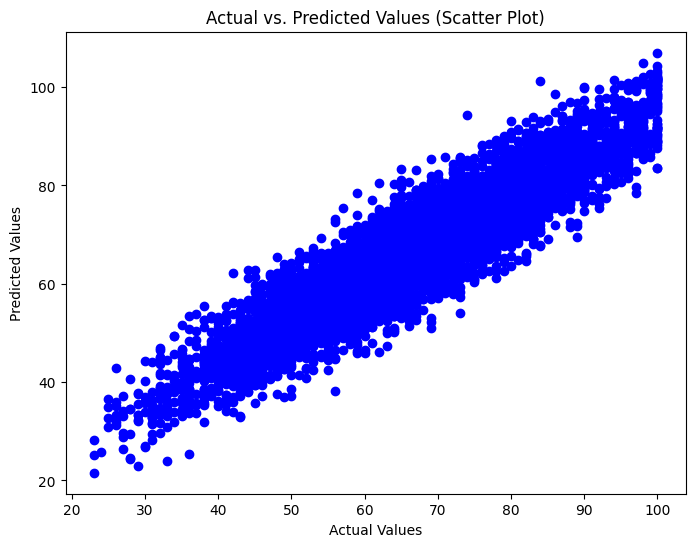

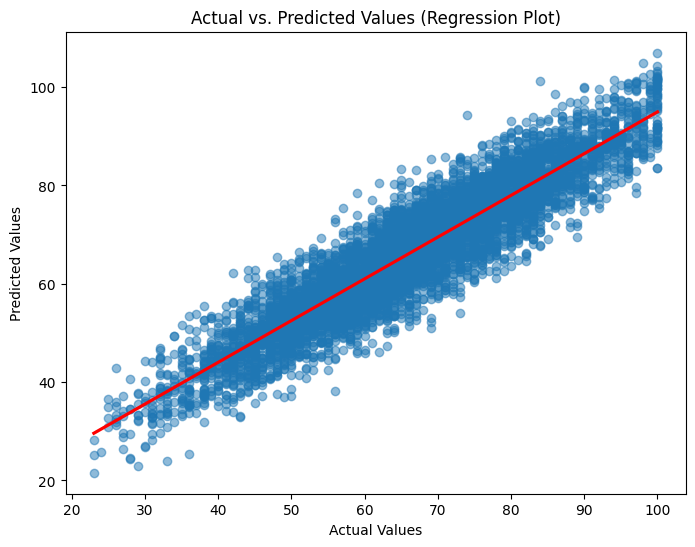

In [29]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs. Predicted Values (Scatter Plot)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Actual vs. Predicted Values (Regression Plot)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

train shape
Xtrain ---> (24380, 10)
Ytrain ---> (24380,)
Test shape
XTest ---> (6095, 10)
YTest ---> (6095,)
Prediction shape
y_test ---> (6095,)
y_pred ---> (6095,)
MAE = 3.3631993676648313
--------------------------------------------------
MSE = 17.70826101966819
--------------------------------------------------
RMSE = 4.20811846549835


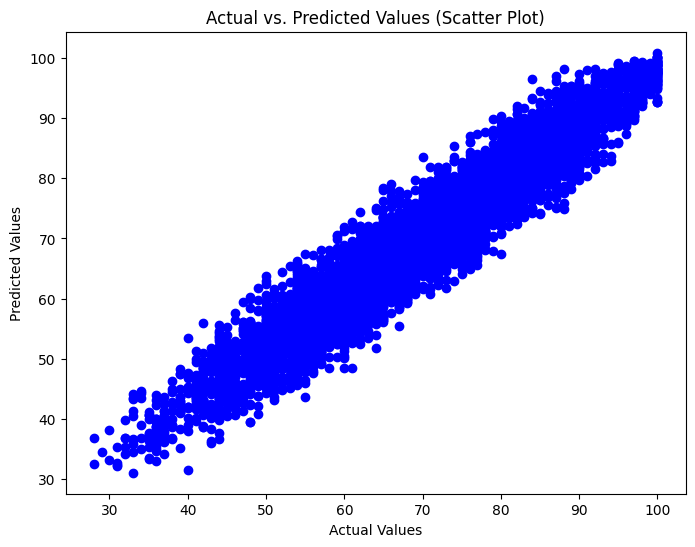

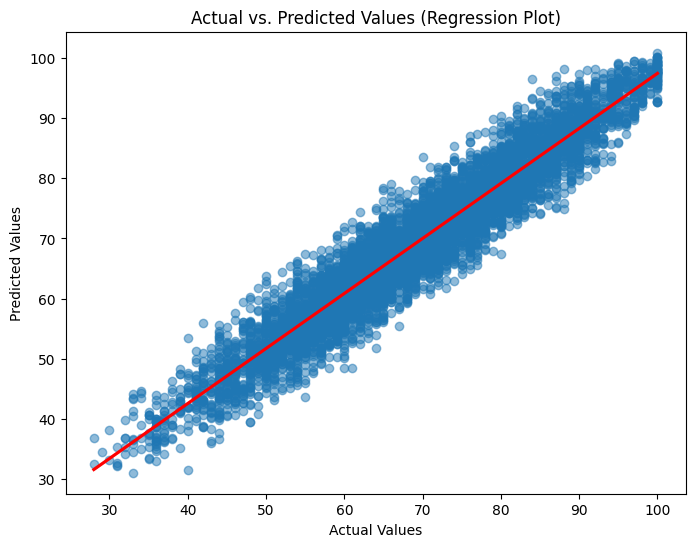

In [33]:
x = df_final[features + ['MathScore', 'WritingScore']]
y = df_final['ReadingScore']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =42)

print('train shape')
print('Xtrain --->', x_train.shape)
print('Ytrain --->', y_train.shape)

print('Test shape')
print('XTest --->', x_test.shape)
print('YTest --->', y_test.shape)


model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Prediction shape')
print('y_test --->', y_test.shape)
print('y_pred --->', y_pred.shape)


print(f"MAE = {mean_absolute_error(y_test,y_pred)}")
print('-'*50)
print(f"MSE = {mean_squared_error(y_test,y_pred)}")
print('-'*50)
print(f"RMSE = {np.sqrt(mean_squared_error(y_test,y_pred))}")

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs. Predicted Values (Scatter Plot)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Actual vs. Predicted Values (Regression Plot)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

train shape
Xtrain ---> (24380, 10)
Ytrain ---> (24380,)
Test shape
XTest ---> (6095, 10)
YTest ---> (6095,)
Prediction shape
y_test ---> (6095,)
y_pred ---> (6095,)
MAE = 3.1751073547400024
--------------------------------------------------
MSE = 15.936563064563005
--------------------------------------------------
RMSE = 3.99206250759717


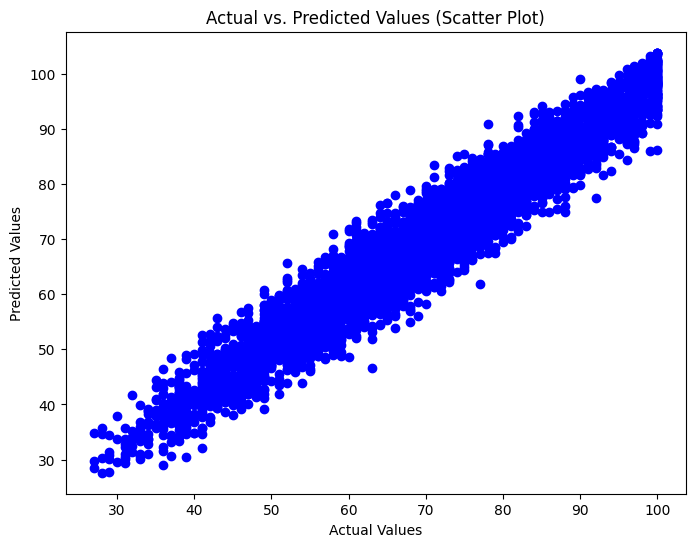

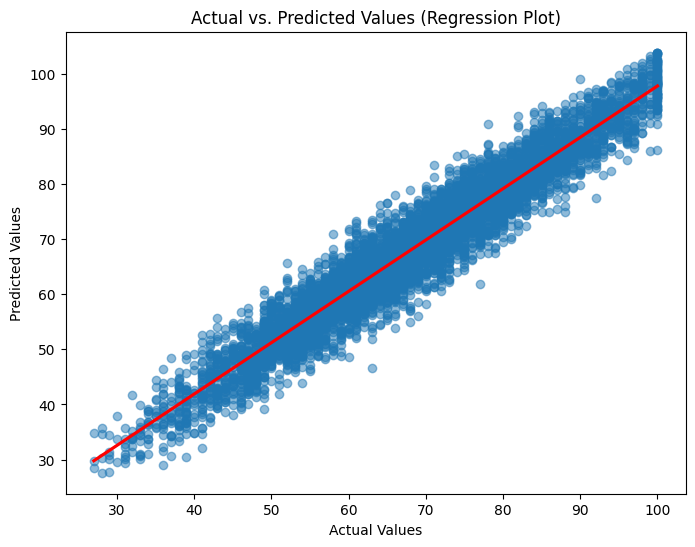

In [34]:
x = df_final[features + ['MathScore', 'ReadingScore']]
y = df_final['WritingScore']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =42)

print('train shape')
print('Xtrain --->', x_train.shape)
print('Ytrain --->', y_train.shape)

print('Test shape')
print('XTest --->', x_test.shape)
print('YTest --->', y_test.shape)


model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Prediction shape')
print('y_test --->', y_test.shape)
print('y_pred --->', y_pred.shape)


print(f"MAE = {mean_absolute_error(y_test,y_pred)}")
print('-'*50)
print(f"MSE = {mean_squared_error(y_test,y_pred)}")
print('-'*50)
print(f"RMSE = {np.sqrt(mean_squared_error(y_test,y_pred))}")

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs. Predicted Values (Scatter Plot)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Actual vs. Predicted Values (Regression Plot)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()